In [24]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.interpolate

%matplotlib inline

from netCDF4 import Dataset

%pylab inline

from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [25]:
# Get field from MITgcm netCDF output
#
''' :statefile : string with /path/to/state.0000000000.t001.nc
    :fieldname : string with the variable name as written on the netCDF file ('Temp', 'S','Eta', etc.)'''

def getField(statefile, fieldname):
    
    StateOut = Dataset(statefile)
    
    Fld = StateOut.variables[fieldname][:]
    
    shFld = np.shape(Fld)
    
        
    if len(shFld) == 2:
        
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1])) # reshape to pcolor order
        return Fld2 
    
    elif len(shFld) == 3:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2])) # reshape to pcolor order
        return Fld2
        
    elif len(shFld) == 4:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2],shFld[3])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2],shFld[3])) # reshape to pcolor order
        return Fld2
        
    else:
        
        print (' Check size of field ')
    
    



In [26]:
filename='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut = Dataset(filename)

#for dimobj in StateOut.variables.values():
#    print dimobj


filename2='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOut = Dataset(filename2)

#for dimobj in GridOut.variables.values():
#    print dimobj


filename3='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3)

#for dimobj in PtracersOut.variables.values():
#    print dimobj

In [27]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
print(z[10])
Time = StateOut.variables['T']
#print(Time[:])

xc = getField(filename2, 'XC') # x coords tracer cells

yc = getField(filename2, 'YC') # y coords tracer cells

bathy = getField(filename2, 'Depth')

-52.5


In [28]:


# Nice cell center mask
hFacC = getField(filename2,'HFacC') #(90,360,360)

hFacCmasked = np.ma.masked_values(hFacC, 0)

MASKhFacC = np.ma.getmask(hFacCmasked)



In [29]:
tt = 4

Tr = getField(filename, 'Temp')
Trmask=np.ma.array(Tr[tt,:,:,:],mask=MASKhFacC[:,:,:])


In [30]:
isoVal = 12.4


In [31]:
IsoSurf = np.where(Tr[tt,:,:,:]>12.5) 

#IsoIndex=~np.isnan(IsoSurf)
IsoIndex = np.nonzero(IsoSurf)

In [32]:
print(IsoSurf)


(array([ 0,  0,  0, ..., 89, 89, 89]), array([  0,   0,   0, ..., 359, 359, 359]), array([  0,   1,   2, ..., 357, 358, 359]))


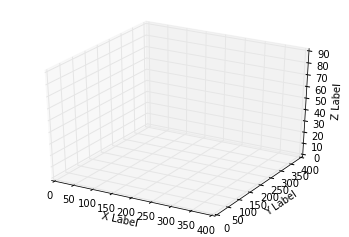

In [33]:

x = IsoSurf[2][::1000]
y = IsoSurf[1][::1000]
z = IsoSurf[0][::1000]

fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.scatter(x, y, z, c='r', marker='o')
ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [36]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure


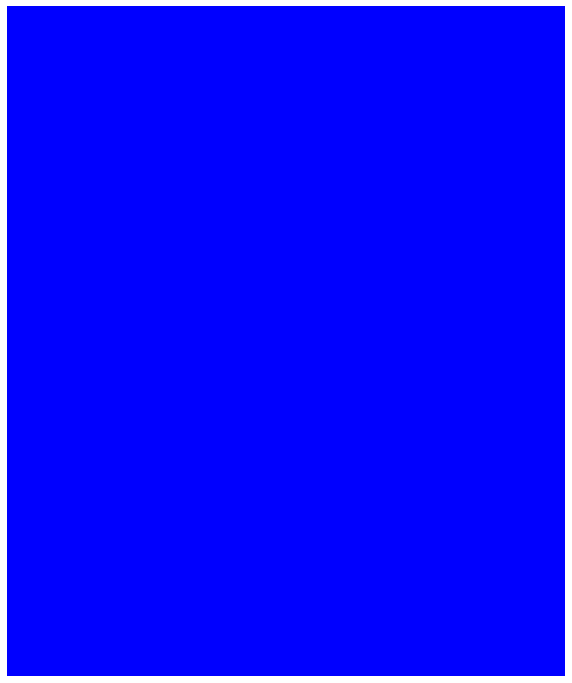

In [40]:
from skimage.draw import ellipsoid
# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)
# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces = measure.marching_cubes(ellip_double, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

#ax.set_xlabel("x-axis: a = 6 per ellipsoid")
#ax.set_ylabel("y-axis: b = 10")
#ax.set_zlabel("z-axis: c = 16")

#ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
#ax.set_ylim(0, 20)  # b = 10
#ax.set_zlim(0, 32)  # c = 16

plt.show()


In [38]:
from mayavi import mlab 
verts, faces = measure.marching_cubes(Tr, 11.2, (1., 1., 2.)) 
mlab.triangular_mesh([vert[0] for vert in verts],
                    [vert[1] for vert in verts],
                    [vert[2] for vert in verts],
                    faces) 
mlab.show() 

ValueError: Input volume must have 3 dimensions.

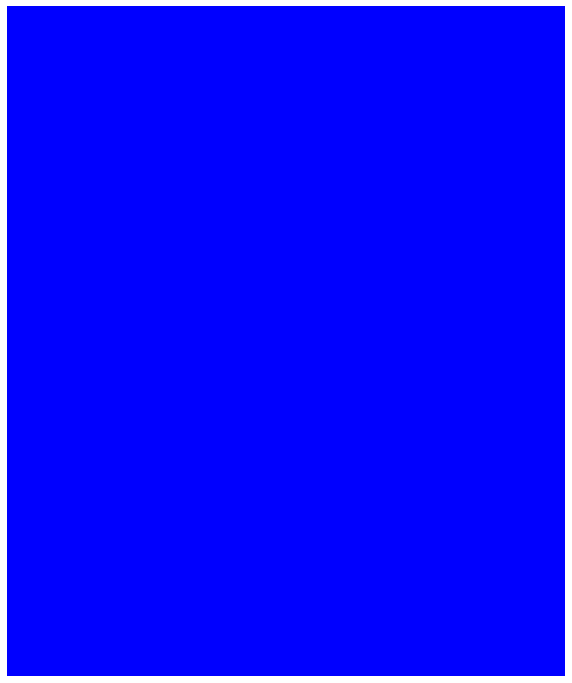

In [39]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
ax.add_collection3d(mesh)

plt.show()